# Agent 3: Multi-node Agent

In this example the agent is composed of multiple nodes in sequence. Each node updates and returns the state.

The graph takes as input,
```python
{
  "name": "Melanie Burger",
  "age": 40,
  "skills": ['padel', 'javascript', 'drawing']
}
```
and returns as output a combined message:
```python
"Hello, Melanie Burger! You are 40 years old and you know padel, javascript, drawing."
```

(<https://youtu.be/jGg_1h0qzaM?si=v9grQb-8KPq5_wle&t=3336>)

In [6]:
%pip install langgraph
from typing import TypedDict
from langgraph.graph import StateGraph
from IPython.display import Image, display

Note: you may need to restart the kernel to use updated packages.


In [2]:
class AgentState(TypedDict):
    name: str
    age: int
    skills: list[str]
    message: str

In [4]:
def greeter_name(state: AgentState) -> AgentState:
    state["message"] = f"Hello, {state['name']}!"
    return state

def greeter_age(state: AgentState) -> AgentState:
    state["message"] += f" You are {state['age']} years old"
    return state

def greeter_skills(state: AgentState) -> AgentState:
    skills = ", ".join(state["skills"])
    state["message"] += f" and you know {skills}."
    return state

In [5]:
graph = StateGraph(AgentState)

graph.add_node("greeter_name", greeter_name)
graph.add_node("greeter_age", greeter_age)
graph.add_node("greeter_skills", greeter_skills)

graph.set_entry_point("greeter_name")
graph.add_edge("greeter_name", "greeter_age")
graph.add_edge("greeter_age", "greeter_skills")
graph.set_finish_point("greeter_skills")

app = graph.compile()

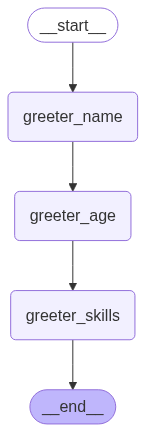

In [7]:
display(Image(app.get_graph().draw_mermaid_png()))

In [9]:
result = app.invoke(
    AgentState(
        name="Melanie Burger",
        age=40,
        skills=["padel", "javascript", "drawing"],
        message=""
    )
)

result["message"]

'Hello, Melanie Burger! You are 40 years old and you know padel, javascript, drawing.'